[Reference](https://medium.com/analytics-vidhya/removing-outliers-from-data-using-python-and-pandas-a3b5c6cded2c)

![pic](https://miro.medium.com/max/1400/1*wz--poSokEehPaqt6Kyxmw.png)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def generate(median=630, err=12, outlier_err=100, size=80, outlier_size=10):
    np.random.seed(median) # The seed is set to the median to force the same output each time the code is run
    errs = err * np.random.rand(size) * np.random.choice((-1, 1), size)
    data = median + errs

    lower_errs = outlier_err * np.random.rand(outlier_size)
    lower_outliers = median - err - lower_errs

    upper_errs = outlier_err * np.random.rand(outlier_size)
    upper_outliers = median + err + upper_errs

    data = np.concatenate((data, lower_outliers, upper_outliers))
    np.random.shuffle(data)

    return data

In [10]:
df_test = pd.DataFrame(generate())
df_test.head()

,0
0,729.346989
1,625.517946
2,628.131548
3,728.244689
4,523.220860


In [11]:
df = pd.DataFrame({'Col0': generate(median=630), 'Col1': generate(median=740), 'Col2': generate(median=220)})

In [12]:
# (modified from http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


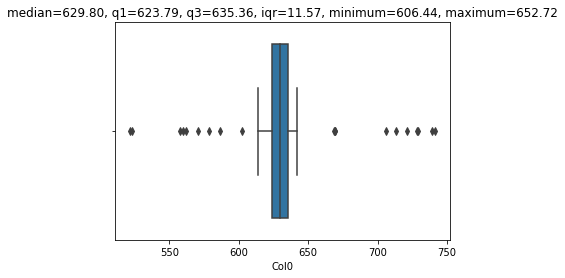

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


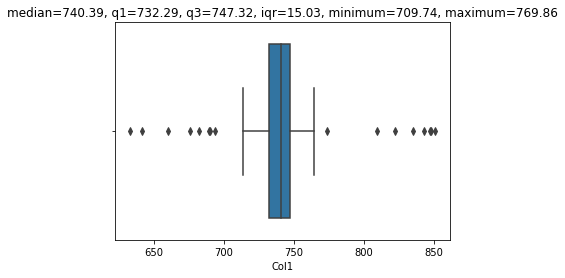

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


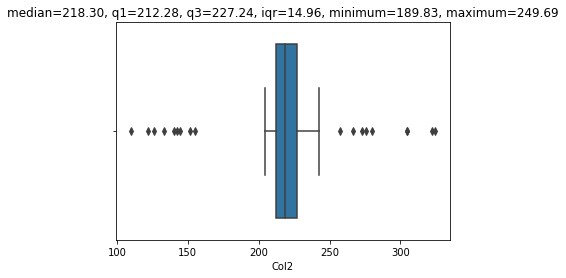

Col0 has 19 outliers
Col1 has 16 outliers
Col2 has 18 outliers


In [15]:
# %% Plot the graphs
box_and_whisker(df, 'Col0')
box_and_whisker(df, 'Col1')
box_and_whisker(df, 'Col2')

_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df, 'Col1')

# %% Count the outliers in the original data frame
print(f"Col0 has {count_outliers(df, 'Col0')} outliers")
print(f"Col1 has {count_outliers(df, 'Col1')} outliers")
print(f"Col2 has {count_outliers(df, 'Col2')} outliers")

_, _, _, _, minimum_Col1_after, maximum_Col1_after = get_iqr_values(df, 'Col1')

In [16]:
# %% Explain the results in data ...
print(f"Col1 original boundaries: minium={minimum_Col1_before:.2f}, maximum={maximum_Col1_before:.2f}")
print(f"Col1 new minimum and maximum values: minium={df['Col1'].min():.2f}, maximum={df['Col1'].max():.2f}")
print(f"Col1 new boundaries: minium={minimum_Col1_after:.2f}, maximum={maximum_Col1_after:.2f}")
print("")
print(f"Col0 has {count_outliers(df, 'Col0')} outliers")
print(f"Col1 has {count_outliers(df, 'Col1')} outliers")
print(f"Col2 has {count_outliers(df, 'Col2')} outliers")

Col1 original boundaries: minium=709.74, maximum=769.86
Col1 new minimum and maximum values: minium=633.22, maximum=850.56
Col1 new boundaries: minium=709.74, maximum=769.86

Col0 has 19 outliers
Col1 has 16 outliers
Col2 has 18 outliers


In [17]:
# df = remove_outliers(df, 'Col0')
# df = remove_outliers(df, 'Col1')
# df = remove_outliers(df, 'Col2')

In [18]:
# %% New helper function ...
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in

Col0 has 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


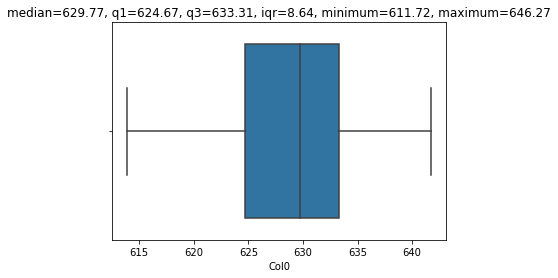

Col1 has 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


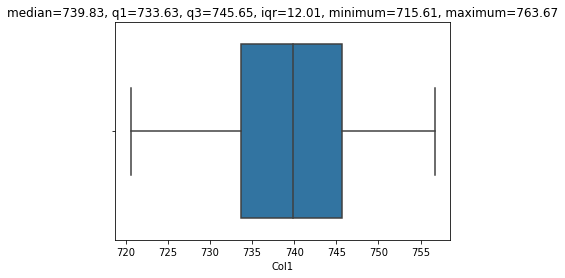

Col2 has 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


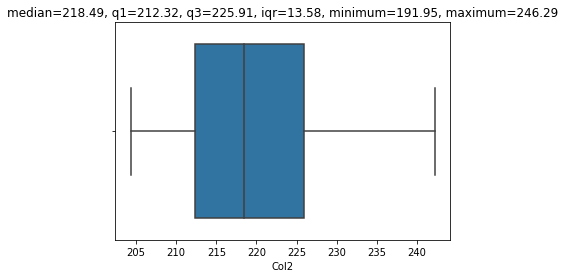

In [19]:
# Note that I wouldn't usually iterate through every column in the data frame removing outliers as the data 
# might not numeric or they might be categorical. The iteration of all columns is just done for expediency here ...
for column in df:
    df = remove_all_outliers(df, column)
    print(f"{column} has {count_outliers(df, column)} outliers")
    box_and_whisker(df, column)

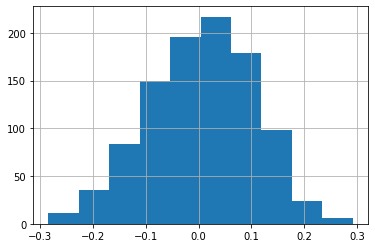

In [20]:
# %% Create a normal distriubtion with some outliers 
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000) # create 1000 normally distributed data points

df_normal = pd.DataFrame({'Col0': s})
df_normal['Col0'].hist()

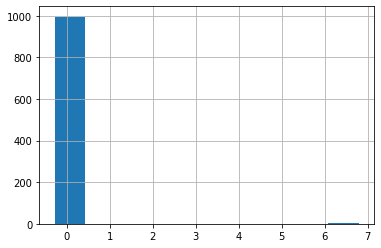

In [21]:
# %% Add some outliers and re-plot 
s[600] = 6
s[700] = 6.5
s[800] = 6.57
s[900] = 6.8

df_normal = pd.DataFrame({'Col0': s})
df_normal['Col0'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


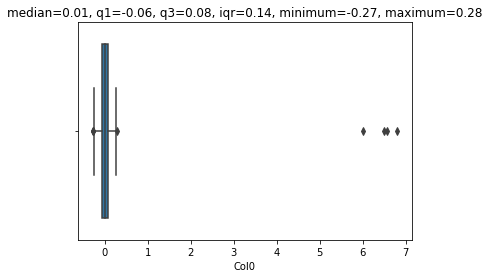

In [22]:
box_and_whisker(df_normal, 'Col0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


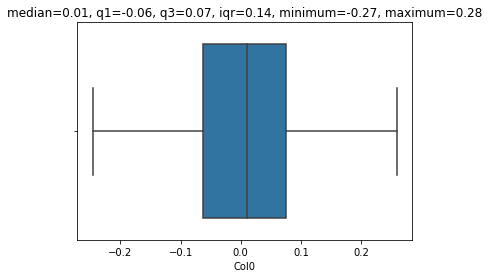

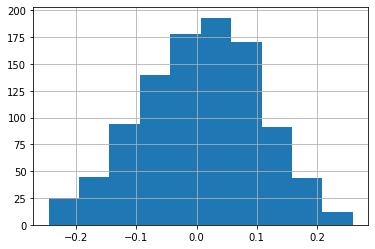

In [23]:
# %% Remove the outliers and re-display the box-and-whisker and the histogram
df_normal = remove_all_outliers(df_normal, 'Col0')
box_and_whisker(df_normal, 'Col0')
df_normal['Col0'].hist()